<a href="https://colab.research.google.com/github/glep93/Motor_Quant/blob/main/Swarms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree, Delaunay, distance

from scipy.spatial.transform import Rotation as R

# Vicksec Model

In [225]:
N  = 128 #number of particles
T = 512 #number of steps
d = 2 #dimension

nnn = 6 #number of nearest neighbours
eta = 4 #noise

def evolution(N, T, eta ,d=2, nnn = 6,L = 10):
  X = np.random.randn(N, d) # initialize the positions
  #X = (X+L/2) % L

  #V = np.random.randn(N, d) # initialize the velocities
  #V / np.linalg.norm(V, axis=1)[:, np.newaxis]

  V = np.zeros((N,d)) + 1/np.sqrt(d)


  X_history = [X]
  V_history = [V]

  for t in range(T):
    tree =  KDTree(X)#, boxsize = L)
    _, neighbors = tree.query(X,range(1,nnn))
    #neighbors = tree.query_ball_point(X,r = L/N**(1/d))

    #noise
    #V_new = eta * np.random.randn(N, d) # initialize the velocities
    #V_new = eta * #V_new / np.linalg.norm(V_new, axis=1)[:, np.newaxis]

    #add old
    X_new = X + V
    V_new += V

    effective_nnn = 0
    for i in range(N):
      #X_new[i] += V[i]
      for j in neighbors[i]:
        if j != i:
          V_new[i] += V[j]
          effective_nnn += 1
      X_new /= effective_nnn

    #normalize
    #noise
    V_new = eta * np.random.randn(N, d)
    V_new = V_new / np.linalg.norm(V_new, axis=1)[:, np.newaxis]
    #X_new = X_new - X_new.mean(axis = 0)
    #X_new = X_new % L

    X_history.append(X_new)
    V_history.append(V_new)

    X = X_new.copy()
    V = V_new.copy()
  return X_history, V_history


X_history, V_history = evolution(N= 128, T= 512, eta = 0.1 ,d=2, nnn = 6,L = 10)

def magnetization(V_history, lag = 128):
  T = len(V_history)
  return np.linalg.norm( np.mean(V_history [lag:], axis = 0).mean(axis = 0))
  #return np.mean([ np.linalg.norm(V_history[i].mean(axis = 0) ) for i in range(lag,T)])

def susceptibility(V_history, lag = 128):
  T = len(V_history)
  #return np.mean([ np.linalg.norm(V_history[i].var(axis = 0) ) for i in range(lag,T)])
  return np.linalg.norm( np.mean( np.var(V_history[lag:], axis = 0)))

In [ ]:
N  = 128 #number of particles
T = 512 #number of steps
d = 2 #dimension

nnn = 6 #number of nearest neighbours
eta = 4 #noise

def evolution(N, T, eta ,d=2, nnn = 6,L = 10):
  X = np.random.randn(N, d) # initialize the positions
  #X = (X+L/2) % L

  #V = np.random.randn(N, d) # initialize the velocities
  #V / np.linalg.norm(V, axis=1)[:, np.newaxis]
  V = np.zeros((N,d)) + 1/np.sqrt(d)

  X_history = [X]
  V_history = [V]

  for t in range(T):
    tree =  KDTree(X)#, boxsize = L)
    #_, neighbors = tree.query(X,range(1,nnn))
    neighbors = tree.query_ball_point(X,r = L/N**(1/d))

    #noise
    V_new = np.random.randn(N, d) # initialize the velocities
    V_new = eta * V_new / np.linalg.norm(V_new, axis=1)[:, np.newaxis]

    #add old
    X_new = X + V
    V_new += V

    effective_nnn = 0
    for i in range(N):
      #X_new[i] += V[i]
      for j in neighbors[i]:
        if j != -1:
          V_new[i] += V[j]
          effective_nnn += 1
        V_new[i] += V[j]/nnn

    noise = np.random.randn(N, d)
    noise = noise/ np.linalg.norm(noise, axis=1)[:, np.newaxis]
    V_new += eta *noise
    V_new = V_new / np.linalg.norm(V_new, axis=1)[:, np.newaxis]
    #X_new = X_new - X_new.mean(axis = 0)
    #X_new = X_new % L

    X_history.append(X_new)
    V_history.append(V_new)

    X = X_new
    V = V_new
  return X_history, V_history


X_history, V_history = evolution(N= 128, T= 512, eta = 0.1 ,d=2, nnn = 6,L = 10)

def magnetization(V_history, lag = 128):
  T = len(V_history)
  return np.linalg.norm( np.mean(V_history [lag:], axis = 0).mean(axis = 0))
  #return np.mean([ np.linalg.norm(V_history[i].mean(axis = 0) ) for i in range(lag,T)])

def susceptibility(V_history, lag = 128):
  T = len(V_history)
  #return np.mean([ np.linalg.norm(V_history[i].var(axis = 0) ) for i in range(lag,T)])
  return np.linalg.norm( np.mean( np.var(V_history[lag:], axis = 0)))

eta: 0.1
m: 0.9997455917019967
CHI: 0.002541655571742629
eta: 0.8666666666666667
m: 0.985388597163935
CHI: 0.016719998558271894
eta: 1.6333333333333335
m: 0.903045345602953
CHI: 0.05644800298242455
eta: 2.4000000000000004
m: 0.822198387229468
CHI: 0.06744448235247069
eta: 3.166666666666667
m: 0.02525090765461101
CHI: 0.15761887244516115
eta: 3.9333333333333336
m: 0.008988929324063243
CHI: 0.12693926034182074
eta: 4.7
m: 0.00472682008952573
CHI: 0.10626351216951224
eta: 5.466666666666667
m: 0.0013503678272219035
CHI: 0.09138252889803121
eta: 6.233333333333333
m: 0.002930547612085983
CHI: 0.08014778662959664
eta: 7.0
m: 0.0046130856436293055
CHI: 0.07137850205204069


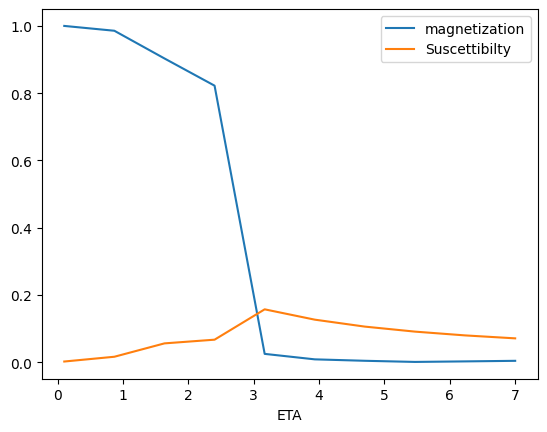

In [232]:
m = []
CHI = []
#ETA =  np.concat((np.linspace(0.1,0.9,4) , np.linspace(1,1.5 ,20),  np.linspace(2,3.5,4)))
ETA = np.linspace(0.1,7,10)
for eta in ETA:
  print('eta:',eta)
  X_history, V_history = evolution(N= 128, T= 2048, eta = eta ,d=2, nnn = 6,L = 1)
  m.append( magnetization(V_history, lag = 512))
  CHI.append(susceptibility(V_history, lag = 512)/eta )
  print('m:',m[-1])
  print('CHI:',CHI[-1])
plt.plot(ETA,m ,label = 'magnetization')
plt.plot(ETA,CHI, label = 'Suscettibilty' )
plt.xlabel('ETA')
plt.legend()

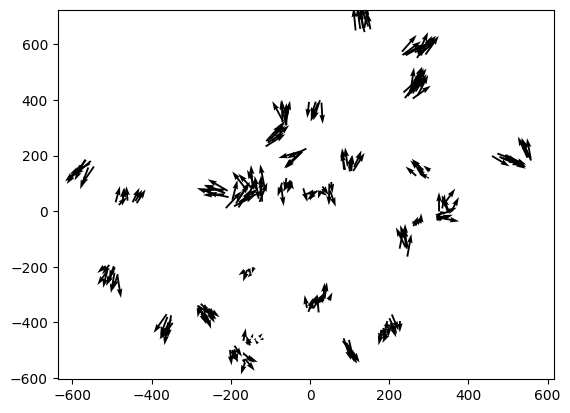

In [ ]:
X_history, V_history = evolution(N= 256, T= 1024, eta =0.5 ,d=3, nnn = 6,L = 1)
plt.quiver(X_history[-1][:,0],X_history[-1][:,1], V_history[-1][:,0],V_history[-1][:,1],)

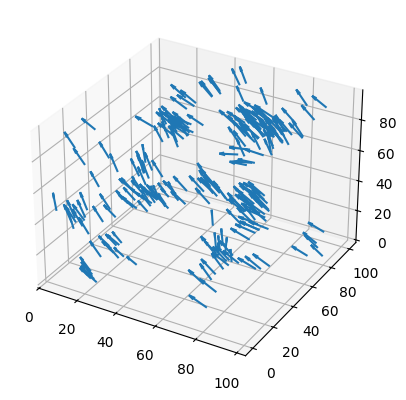

In [ ]:
X_history, V_history = evolution(N= 256, T= 4096, eta = 0.2 ,d=3, nnn = 6,L = 100)

ax = plt.figure().add_subplot(projection='3d')
ax.quiver(X_history[-1][:,0],X_history[-1][:,1],X_history[-1][:,2], V_history[-1][:,0],V_history[-1][:,1],V_history[-1][:,2], length=10, normalize=True)

In [ ]:
X_history, V_history = evolution(N= 128, T= 5000, eta = 2 ,d=2, nnn = 6,L = 1)

KeyboardInterrupt: 

(array([ 68., 149., 288., 337., 436., 438., 463., 430., 418., 354., 312.,
        287., 258., 206., 140., 109.,  98.,  75.,  48.,  28.,  24.,  16.,
          8.,   6.,   3.,   0.,   1.,   0.,   0.,   1.]),
 array([0.00135096, 0.01148496, 0.02161896, 0.03175296, 0.04188696,
        0.05202096, 0.06215496, 0.07228896, 0.08242296, 0.09255696,
        0.10269096, 0.11282496, 0.12295896, 0.13309296, 0.14322695,
        0.15336095, 0.16349495, 0.17362895, 0.18376295, 0.19389695,
        0.20403095, 0.21416495, 0.22429895, 0.23443295, 0.24456695,
        0.25470095, 0.26483495, 0.27496895, 0.28510295, 0.29523695,
        0.30537094]),
 <BarContainer object of 30 artists>)

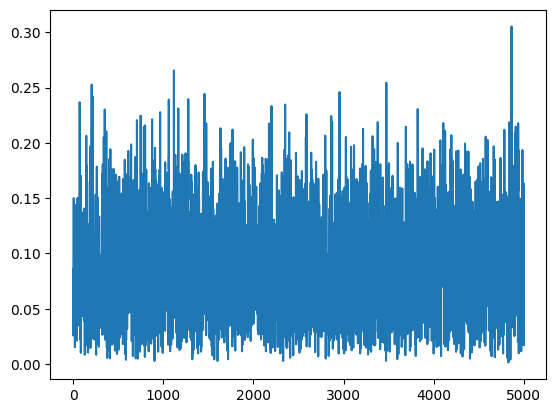

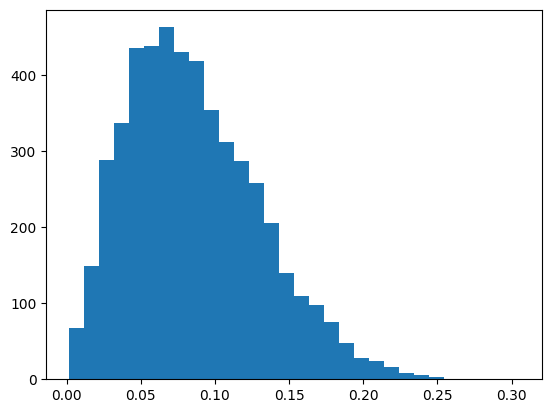

In [ ]:

plt.plot([ np.linalg.norm(V_history[i].mean(axis = 0) ) for i in range(0,len(V_history))])

plt.figure()
plt.hist([ np.linalg.norm(V_history[i].mean(axis = 0) ) for i in range(0,len(V_history))] ,bins = 30)

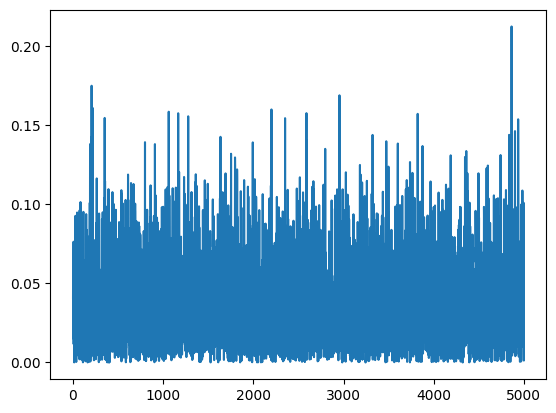

In [ ]:
lag = 500
T = len(V_history)


plt.plot( range(1,T) ,  [np.linalg.norm( np.mean(V_history [i], axis = 0).mean(axis = 0)) for i in range(1,T) ] )

(array([16., 10., 12., 12.,  9., 10.,  4.,  2.,  2.,  2.]),
 array([0.00076062, 0.01159857, 0.02243652, 0.03327447, 0.04411242,
        0.05495037, 0.06578833, 0.07662628, 0.08746423, 0.09830218,
        0.10914013]),
 <BarContainer object of 10 artists>)

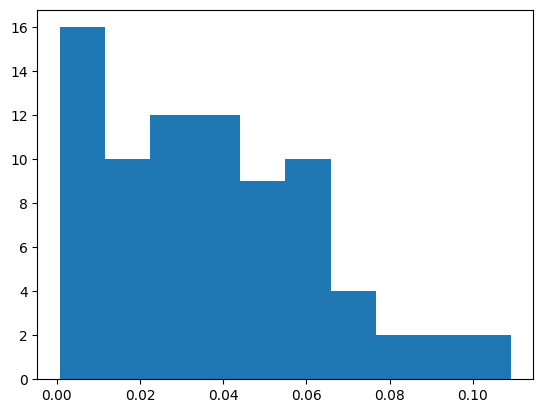

In [ ]:
plt.hist([np.linalg.norm( np.mean(V_history [i], axis = 0).mean(axis = 0)) for i in range(1,T,64) ]  ,bins = 10)

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

# Correlation at t = 0

In [ ]:

#def correlation(N, T, lag ,eta ,L = 10 ,d=2, nnn = 6 ):
#
#  X_history, V_history = evolution(N= N, T= T, eta = eta ,d=d, nnn = nnn,L = L)
#
#  r_bins = np.linspace(0, L*np.sqrt(d)/2, 50)
#  C = np.zeros(len(r_bins)-1)
#
#  m = np.mean(V_history,axis = 0)
#  dV_history = V_history - m
#  dt = 1
#
#  for t in range(lag , len(X_history),dt):
#    tree = KDTree(X_history[t], boxsize = L)
#    C_aux = np.zeros(len(r_bins)-1)
#    for e in range(len(r_bins)-1):
#      pairs = tree.query_pairs(r_bins[e+1]) - tree.query_pairs(r_bins[e])
#      for (i,j) in pairs:
#        C_aux[e]  += np.dot(dV_history[t][i] , dV_history[t][j])
#      C_aux[e]/= len(pairs)
#    C += C_aux/len(range(lag , len(X_history),dt))
#  return r_bins[:-1] + np.diff(r_bins)/2 , C

def correlation(N, T, lag ,eta ,L = 10 ,d=2, nnn = 6 ):
  X_history, V_history = evolution(N= N, T= T, eta = eta ,d=d, nnn = nnn,L = L)

  R = np.array([distance.cdist(X_history [i],X_history[i] ) for i in range(lag,T) ])


  m = np.mean(V_history[lag:T],axis = 0)
  dV_history = V_history - m


  #c = np.array([ np.array([np.array([np.dot(dV_history[t][i] ,dV_history[t][j] ) for i in range(N)]) for j in range(N)]) for t in range(lag,T) ])
  c = np.array([np.dot(dV_history[t], dV_history[t].T ) for t  in range(lag,T)])
  bins = 50
  #rbins = np.linspace(0, np.max(R) ,bins )
  rbins = np.linspace(0, L, bins)
  C = [ c[ (R>rbins[i]) & (R<=rbins[i+1])].mean() for i in range(bins-1) ]

  return rbins[:-1] + np.diff(rbins)/2 , C

def SpatialCorrelation(X,V):
  T ,N,d= np.shape(X)

  R = np.array([distance.cdist(X [i],X[i] ) for i in range(T) ])

  m = np.mean(V,axis = 0)
  dV = V - m

  c = np.array([np.dot(dV[t], dV[t].T ) for t  in range(T)])
  bins = 50
  rbins = np.linspace(0, np.max(R) ,bins )

  C = [ c[ (R>rbins[i]) & (R<=rbins[i+1])].mean() for i in range(bins-1) ]

  return rbins[:-1] + np.diff(rbins)/2 , C


1.3
1.4
1.5
1.6


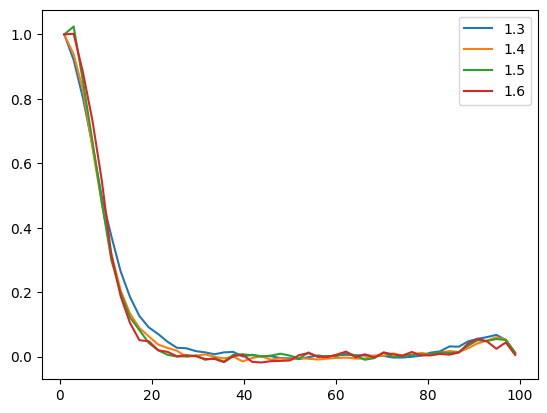

In [ ]:

Corr = {}
ETA = [1.3, 1.4, 1.5, 1.6]
for eta in ETA:
  print(eta)
  Corr[eta] =  correlation(N=128, T=4096, lag=512 ,eta= eta ,L = 100 ,d=2, nnn = 6 )
  plt.plot(Corr[eta][0], Corr[eta][1]/  Corr[eta][1][0] , label = eta)
plt.legend()

1.3
1.4
1.5
1.6
1.7
1.8


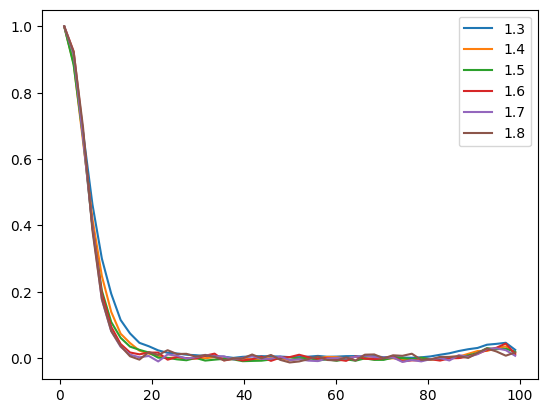

In [ ]:

Corr = {}
ETA = [1.3, 1.4, 1.5, 1.6, 1.7,1.8]
for eta in ETA:
  print(eta)
  Corr[eta] =  correlation(N=256, T=4096, lag=512 ,eta= eta ,L = 100 ,d=2, nnn = 6 )
  plt.plot(Corr[eta][0], Corr[eta][1]/  Corr[eta][1][0] , label = eta)
plt.legend()

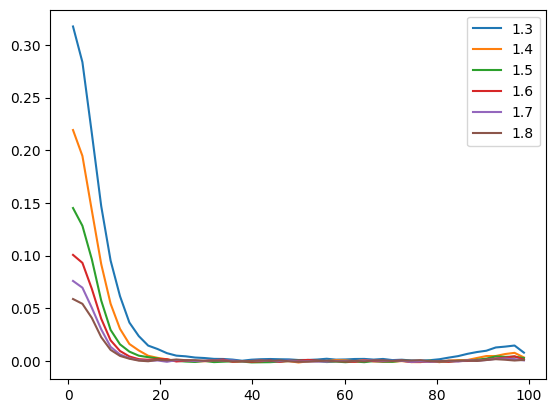

In [ ]:
for eta in ETA:
  plt.plot(Corr[eta][0],  Corr[eta][1] , label = eta)
  plt.legend()


In [ ]:
def Fourier (r,C, N):
  dx = (np.diff(r)[:-1] +  np.diff(r[1:]) )/2
  rm = r[1:-1]
  K = np.linspace(0, 1/np.min(dx) ,N )
  F = np.zeros(N)
  for i,k in enumerate(K):
    F[i] = np.sum(  dx * np.sin(k*rm)*C[1:-1]/(k*rm) )
  return K,F

/tmp/ipython-input-1573047436.py:2: RuntimeWarning: divide by zero encountered in divide
  C = np.exp(-r)/(r*2)
/tmp/ipython-input-818227081.py:7: RuntimeWarning: invalid value encountered in divide
  F[i] = np.sum(  dx * np.sin(k*rm)*C[1:-1]/(k*rm) )


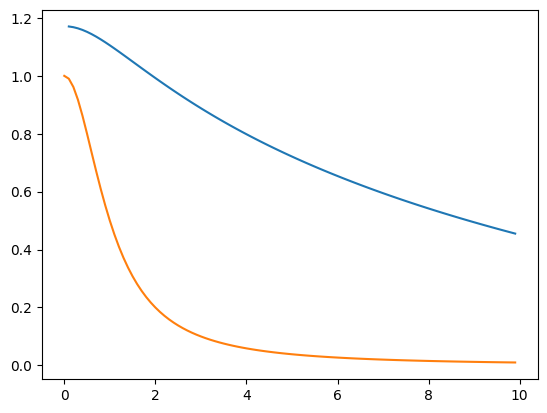

In [ ]:
r = np.linspace(0,10,100)
C = np.exp(-r)/(r*2)
k, F = Fourier (r,C, N= 100)
plt.plot(k,F)
plt.plot(k, 1/(1+k**2))

In [ ]:
r = np.linspace(0,10,100)
np.min(np.diff(r))

np.float64(0.10101010101010033)

In [ ]:

dx = np.diff(r)
rm = r[:-1] + dx/2
len(rm), len(dx)

(99, 99)

In [ ]:
dx = (np.diff(r)[:-1] +  np.diff(r[1:]) )/2
rm = r[1:-1]
K = np.linspace(0, np.min(dx) ,N )
F = np.zeros(N)
for i,k in enumerate(K):
  F[i] = np.sum(  dx * np.sin(k*rm)*C[1:-1]/(k*rm) )

/tmp/ipython-input-3249895604.py:6: RuntimeWarning: invalid value encountered in divide
  F[i] = np.sum(  dx * np.sin(k*rm)*C[1:-1]/(k*rm) )


In [ ]:
len(dx), len(k*rm)

(98, 98)

/tmp/ipython-input-818227081.py:7: RuntimeWarning: invalid value encountered in divide
  F[i] = np.sum(  dx * np.sin(k*rm)*C[1:-1]/(k*rm) )


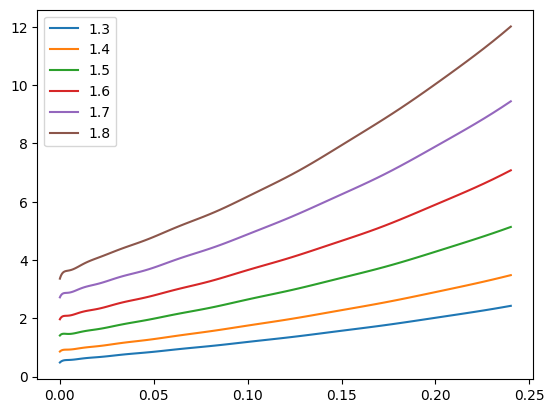

In [ ]:
for eta in  ETA:
  k, F = Fourier (Corr[eta][0],  Corr[eta][1], N= 100)
  plt.plot(k**2, 1/F , label = eta)
plt.legend()

In [ ]:
def timecorrelation(X):
  T ,N,d= np.shape(X  )
  dX= X - np.mean(X,axis = 0)
  c = np.zeros(T)
  for i in range(N):
    for j in range(d):
        c += np.correlate( dX[:,i,j], dX[:,i,j], 'full')[T-1:]
  c /= N
  c /= np.flip(np.arange(T) )
  return c

1.3


/tmp/ipython-input-69214609.py:9: RuntimeWarning: divide by zero encountered in divide
  c /= np.flip(np.arange(T) )


1.4
1.5
1.6


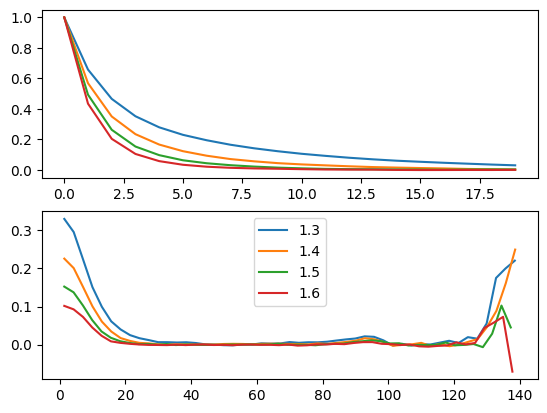

In [ ]:

Corr = {}
ETA = [1.3, 1.4, 1.5, 1.6]
lag = 512

plt.figure(1)

for eta in ETA:
  print(eta)

  X_history, V_history = evolution(N= 128,T=4096, eta = eta ,d=2, nnn = 6,L = 100)

  Corr[eta] = [timecorrelation(V_history[lag:T]),   SpatialCorrelation(X_history[lag:T] ,V_history[lag:T])]

  plt.subplot(11)
  plt.plot( Corr[eta][0][:20] , label = eta)
  plt.legend()

  plt.subplot(12)
  plt.plot( Corr[eta][1][0], Corr[eta][1][1], label = eta)
plt.legend()

In [ ]:
  X = dV_history
  T ,N,d= np.shape(X  )
  c = np.zeros(T)
  for i in range(N):
    for j in range(d):
        c += np.correlate( X[:,i,j], X[:,i,j], 'full')[T-1:]
  c /= N
  c /= np.flip(np.arange(T) )

/tmp/ipython-input-616383361.py:8: RuntimeWarning: divide by zero encountered in divide
  c /= np.flip(np.arange(T) )


In [ ]:
np.random.rand(100, 3)

array([[0.44301446, 0.59568404, 0.18249597],
       [0.49771181, 0.73101191, 0.5678173 ],
       [0.69062851, 0.25421917, 0.66517095],
       [0.3640198 , 0.20016217, 0.81533526],
       [0.37657486, 0.34627236, 0.37572763],
       [0.33537858, 0.24558226, 0.56324965],
       [0.49968243, 0.76265041, 0.43665054],
       [0.61032881, 0.92434935, 0.49194239],
       [0.34523281, 0.26032409, 0.52089934],
       [0.38422525, 0.62660995, 0.14531462],
       [0.71719338, 0.57114087, 0.32795848],
       [0.61737097, 0.56366913, 0.97021153],
       [0.13733137, 0.88039194, 0.33058984],
       [0.12324173, 0.98790557, 0.51611308],
       [0.93519118, 0.99286716, 0.1091754 ],
       [0.24907495, 0.50806167, 0.0734926 ],
       [0.45754381, 0.01979171, 0.59300881],
       [0.04922415, 0.11216504, 0.33857935],
       [0.9867821 , 0.10323671, 0.48983215],
       [0.2286493 , 0.55062248, 0.88496097],
       [0.86692869, 0.16681461, 0.40087883],
       [0.51539802, 0.77252719, 0.7950624 ],
       [0.